# **ANAYZING PRIVATE SCHOOL ENROLLMENT PER COUNTY IN 2024**

In this notebook, we explore data from the Humanitarian Data Organization on the Private School Enrollment in Kenya based on gender and County. 
The link to the data can be found in the link [2024 private school data]('https://data.humdata.org/dataset/kenya-private-schools-primary-school-enrollment-per-gender-per-county')

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
from scipy import stats

In [20]:
df = pd.read_csv(r"D:\Data Science Lectures\Oasis_tasks\private_primary_enrollment_by_gender_class.csv")

In [21]:
df.head()

,objectid,county,class1_boys,class1_girls,class2_boys,class2_girls,class3_boys,class3_girls,class4_boys,class4_girls,class5_boys,class5_girls,class6_boys,class6_girls,class7_boys,class7_girls,class8_boys,class8_girls,year_
0,1,BARINGO,1203,1169,1149,1045,1060,1020,1145,1017,1059,1010,1058,907,853,841,568,523,2014-12-31T00:00:00.000Z
1,2,BOMET,2405,2056,2235,2071,2272,2100,2333,2047,2135,2142,2091,1971,1910,2099,1680,1611,2014-12-31T00:00:00.000Z
2,3,BUNGOMA,3101,3072,2809,2817,2691,2672,2557,2717,2340,2467,2329,2363,2116,2187,1447,1589,2014-12-31T00:00:00.000Z
3,4,BUSIA,1595,1573,1410,1278,1244,1188,1188,1065,1085,962,895,894,660,596,573,454,2014-12-31T00:00:00.000Z
4,5,EMBU,1276,1206,1226,1037,1183,1120,1205,1054,1072,1022,990,959,930,1382,845,825,2014-12-31T00:00:00.000Z


In [22]:
df.dtypes

objectid         int64
county          object
class1_boys      int64
class1_girls     int64
class2_boys      int64
class2_girls     int64
class3_boys      int64
class3_girls     int64
class4_boys      int64
class4_girls     int64
class5_boys      int64
class5_girls     int64
class6_boys      int64
class6_girls     int64
class7_boys      int64
class7_girls     int64
class8_boys      int64
class8_girls     int64
year_           object
dtype: object

In [23]:
df['year_'] = pd.to_datetime(df['year_'])

In [24]:
df.dtypes

objectid                      int64
county                       object
class1_boys                   int64
class1_girls                  int64
class2_boys                   int64
class2_girls                  int64
class3_boys                   int64
class3_girls                  int64
class4_boys                   int64
class4_girls                  int64
class5_boys                   int64
class5_girls                  int64
class6_boys                   int64
class6_girls                  int64
class7_boys                   int64
class7_girls                  int64
class8_boys                   int64
class8_girls                  int64
year_           datetime64[ns, UTC]
dtype: object

### **Exploratory Data Analysis**

#### 1. Visualzie the number of boys enrolled in Class one

In [44]:
df2.describe()

,class1_boys,class1_girls,class2_boys,class2_girls,class3_boys,class3_girls,class4_boys,class4_girls,class5_boys,class5_girls,class6_boys,class6_girls,class7_boys,class7_girls,class8_boys,class8_girls,Total_boys,Total_girls,Total
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2691.595745,2569.382979,2519.021277,2404.957447,2430.574468,2321.680851,2302.510638,2195.808511,2116.808511,2038.531915,1984.617021,1890.489362,1737.404255,1735.659574,1478.595745,1438.914894,16595.425532,17261.127660,33856.553191
std,3439.842177,3431.800735,3282.704403,3225.845100,3150.983351,3155.549529,2930.141753,2978.703282,2669.810168,2679.910510,2386.929732,2435.844688,2078.036769,2173.795181,1830.651876,1903.077014,21822.669193,21609.523413,43357.335977
min,217.000000,215.000000,217.000000,195.000000,206.000000,185.000000,168.000000,169.000000,168.000000,163.000000,136.000000,136.000000,108.000000,105.000000,53.000000,59.000000,1269.000000,1273.000000,2542.000000
25%,893.000000,799.000000,794.500000,759.000000,773.000000,698.500000,761.500000,734.000000,738.500000,659.500000,697.000000,636.500000,590.500000,534.000000,457.000000,439.000000,5148.000000,5505.000000,10564.000000
50%,1786.000000,1759.000000,1743.000000,1675.000000,1671.000000,1645.000000,1704.000000,1637.000000,1647.000000,1571.000000,1470.000000,1487.000000,1399.000000,1464.000000,1217.000000,1112.000000,12947.000000,12687.000000,25168.000000
75%,3119.500000,3079.500000,2947.000000,2854.000000,2871.500000,2761.000000,2747.500000,2669.000000,2547.500000,2402.000000,2369.000000,2193.500000,2026.000000,2066.500000,1727.500000,1610.000000,19647.000000,20140.000000,40377.000000
max,21805.000000,22524.000000,20931.000000,21256.000000,20411.000000,21044.000000,19300.000000,19969.000000,17620.000000,17902.000000,15663.000000,16210.000000,13534.000000,14288.000000,11675.000000,12252.000000,145445.000000,140939.000000,286384.000000


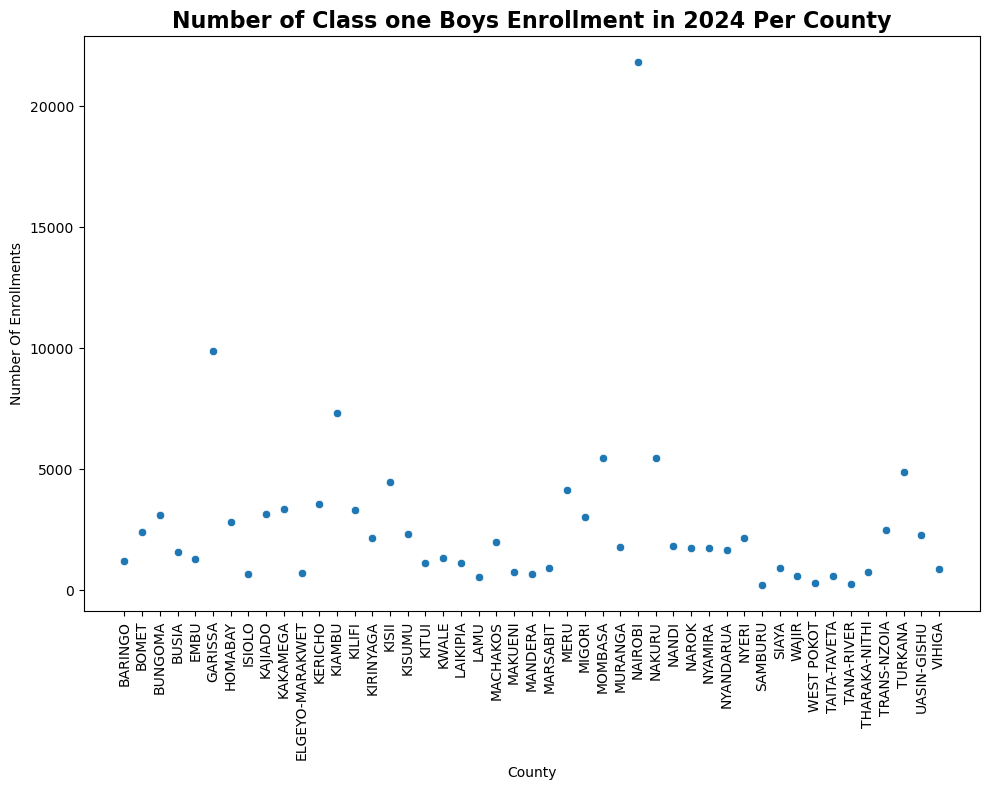

In [25]:
labels = df.county
plt.figure(figsize = (10, 8))
sns.scatterplot(df, x='county', y='class1_boys')
plt.xticks(rotation=90)
plt.title('Number of Class one Boys Enrollment in 2024 Per County', weight = 'bold', fontsize = 16)
plt.tight_layout()
plt.ylabel('Number Of Enrollments')
plt.xlabel('County')
plt.show()


In [26]:
df2 = df.copy()
df2.head()

,objectid,county,class1_boys,class1_girls,class2_boys,class2_girls,class3_boys,class3_girls,class4_boys,class4_girls,class5_boys,class5_girls,class6_boys,class6_girls,class7_boys,class7_girls,class8_boys,class8_girls,year_
0,1,BARINGO,1203,1169,1149,1045,1060,1020,1145,1017,1059,1010,1058,907,853,841,568,523,2014-12-31 00:00:00+00:00
1,2,BOMET,2405,2056,2235,2071,2272,2100,2333,2047,2135,2142,2091,1971,1910,2099,1680,1611,2014-12-31 00:00:00+00:00
2,3,BUNGOMA,3101,3072,2809,2817,2691,2672,2557,2717,2340,2467,2329,2363,2116,2187,1447,1589,2014-12-31 00:00:00+00:00
3,4,BUSIA,1595,1573,1410,1278,1244,1188,1188,1065,1085,962,895,894,660,596,573,454,2014-12-31 00:00:00+00:00
4,5,EMBU,1276,1206,1226,1037,1183,1120,1205,1054,1072,1022,990,959,930,1382,845,825,2014-12-31 00:00:00+00:00


In [27]:
df2.drop(columns = ['year_'], inplace=True)

In [28]:
df2.head()

,objectid,county,class1_boys,class1_girls,class2_boys,class2_girls,class3_boys,class3_girls,class4_boys,class4_girls,class5_boys,class5_girls,class6_boys,class6_girls,class7_boys,class7_girls,class8_boys,class8_girls
0,1,BARINGO,1203,1169,1149,1045,1060,1020,1145,1017,1059,1010,1058,907,853,841,568,523
1,2,BOMET,2405,2056,2235,2071,2272,2100,2333,2047,2135,2142,2091,1971,1910,2099,1680,1611
2,3,BUNGOMA,3101,3072,2809,2817,2691,2672,2557,2717,2340,2467,2329,2363,2116,2187,1447,1589
3,4,BUSIA,1595,1573,1410,1278,1244,1188,1188,1065,1085,962,895,894,660,596,573,454
4,5,EMBU,1276,1206,1226,1037,1183,1120,1205,1054,1072,1022,990,959,930,1382,845,825


#### 2. Which County has the highest number of class 1 girls enrollment

In [29]:

gc1_high= df2['class1_girls'].max()
highest = df2[df2['class1_girls'] == gc1_high]['county'].values[0]
highest

'NAIROBI'

#### 3. Which County has the lowest number of girls in class 8

In [30]:

gc8_low = df2['class8_girls'].min()
lowest = df2[df2['class8_girls']==gc8_low]['county'].values[0]
print(f'County: {lowest}, Number of Girls: {gc8_low}')

County: TANA-RIVER, Number of Girls: 59


#### 4.Visualize the Number of Boys and Girls Enrolled per County

In [31]:
df2.drop(columns = 'objectid', inplace= True)
df2.columns

Index(['county', 'class1_boys', 'class1_girls', 'class2_boys', 'class2_girls',
       'class3_boys', 'class3_girls', 'class4_boys', 'class4_girls',
       'class5_boys', 'class5_girls', 'class6_boys', 'class6_girls',
       'class7_boys', 'class7_girls', 'class8_boys', 'class8_girls'],
      dtype='object')

In [32]:
# We shall Find the Total Numbber of Boys and Girls in all streams per county and add them as a column

#Total Boys enrollment
list2 = []
for i in df2.index:
    sum_i = df2.iloc[i, [2, 4, 6, 8, 10, 12, 14, 16]].sum().sum()
    list2.append(sum_i)

df2['Total_boys'] = list2


list3 = []
for i in df2.index:
    sum_i = df2.iloc[i, [1, 3, 5, 7, 9, 11, 13, 15]].sum().sum()
    list3.append(sum_i)

df2['Total_girls'] = list3    
    
    

In [33]:
df2.tail()

,county,class1_boys,class1_girls,class2_boys,class2_girls,class3_boys,class3_girls,class4_boys,class4_girls,class5_boys,class5_girls,class6_boys,class6_girls,class7_boys,class7_girls,class8_boys,class8_girls,Total_boys,Total_girls
42,THARAKA-NITHI,738,753,705,739,729,690,705,665,532,614,476,496,392,472,363,398,4827,4640
43,TRANS-NZOIA,2493,2539,2365,2329,2241,2305,2315,2191,1974,2071,1850,1880,1712,1826,1437,1373,16514,16387
44,TURKANA,4865,4402,4051,3670,4081,3237,3649,2842,2961,2010,3123,1568,2196,974,1300,707,19410,26226
45,UASIN-GISHU,2259,2191,2163,2175,2136,2050,1941,1932,1836,1800,1775,1737,1631,1632,1355,1324,14841,15096
46,VIHIGA,881,845,834,779,730,650,632,630,585,618,548,543,408,420,326,424,4909,4944


In [34]:
total_students = df2[['county', 'Total_boys', 'Total_girls']]
total_students.head()

,county,Total_boys,Total_girls
0,BARINGO,7532,8095
1,BOMET,16097,17061
2,BUNGOMA,19884,19390
3,BUSIA,8010,8650
4,EMBU,8605,8727


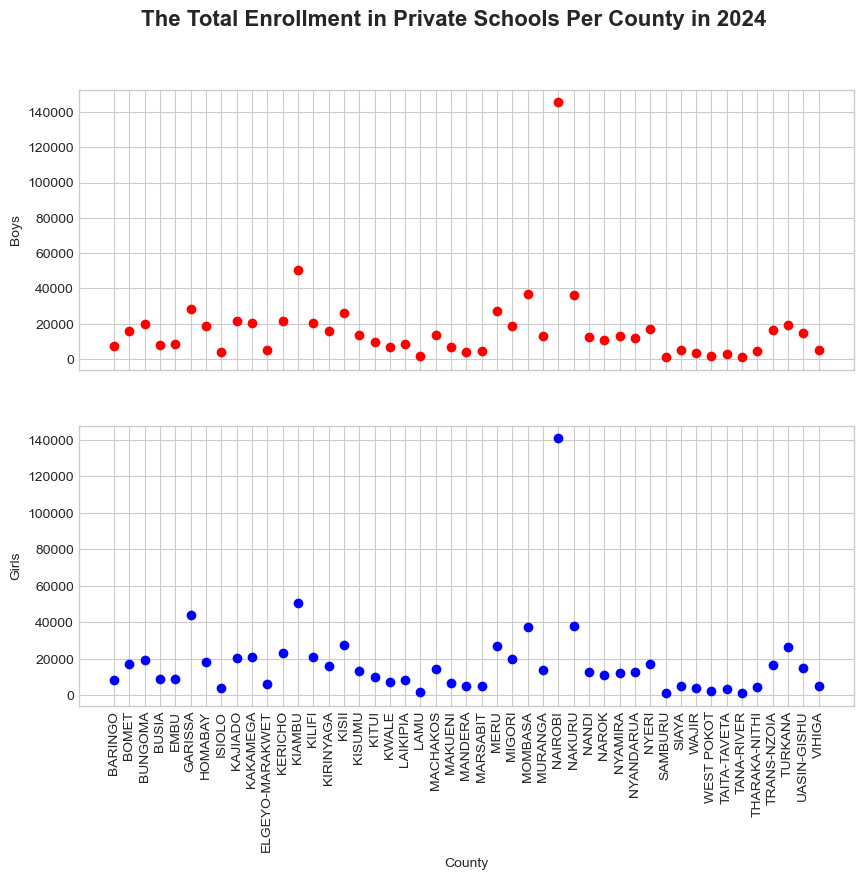

In [35]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(nrows = 2, 
                               ncols=1,
                               figsize = (10, 8),
                               sharex=True)
ax1.scatter(x = df2['county'], y = df2['Total_boys'], color = 'red')
ax2.scatter(x = df2['county'], y = df2['Total_girls'], color = 'blue')
plt.xticks(rotation=90)
fig.suptitle('The Total Enrollment in Private Schools Per County in 2024', weight = 'bold', fontsize = 16)
ax1.set(ylabel = 'Boys')
ax2.set(xlabel = 'County', ylabel='Girls')
plt.show()

#### 5. Visualize Enrollment Distribution of Students per County

In [36]:
df2['Total'] = df2['Total_boys'] + df2['Total_girls']

In [70]:

df4 = df2[['county', 'Total']].sort_values('Total')

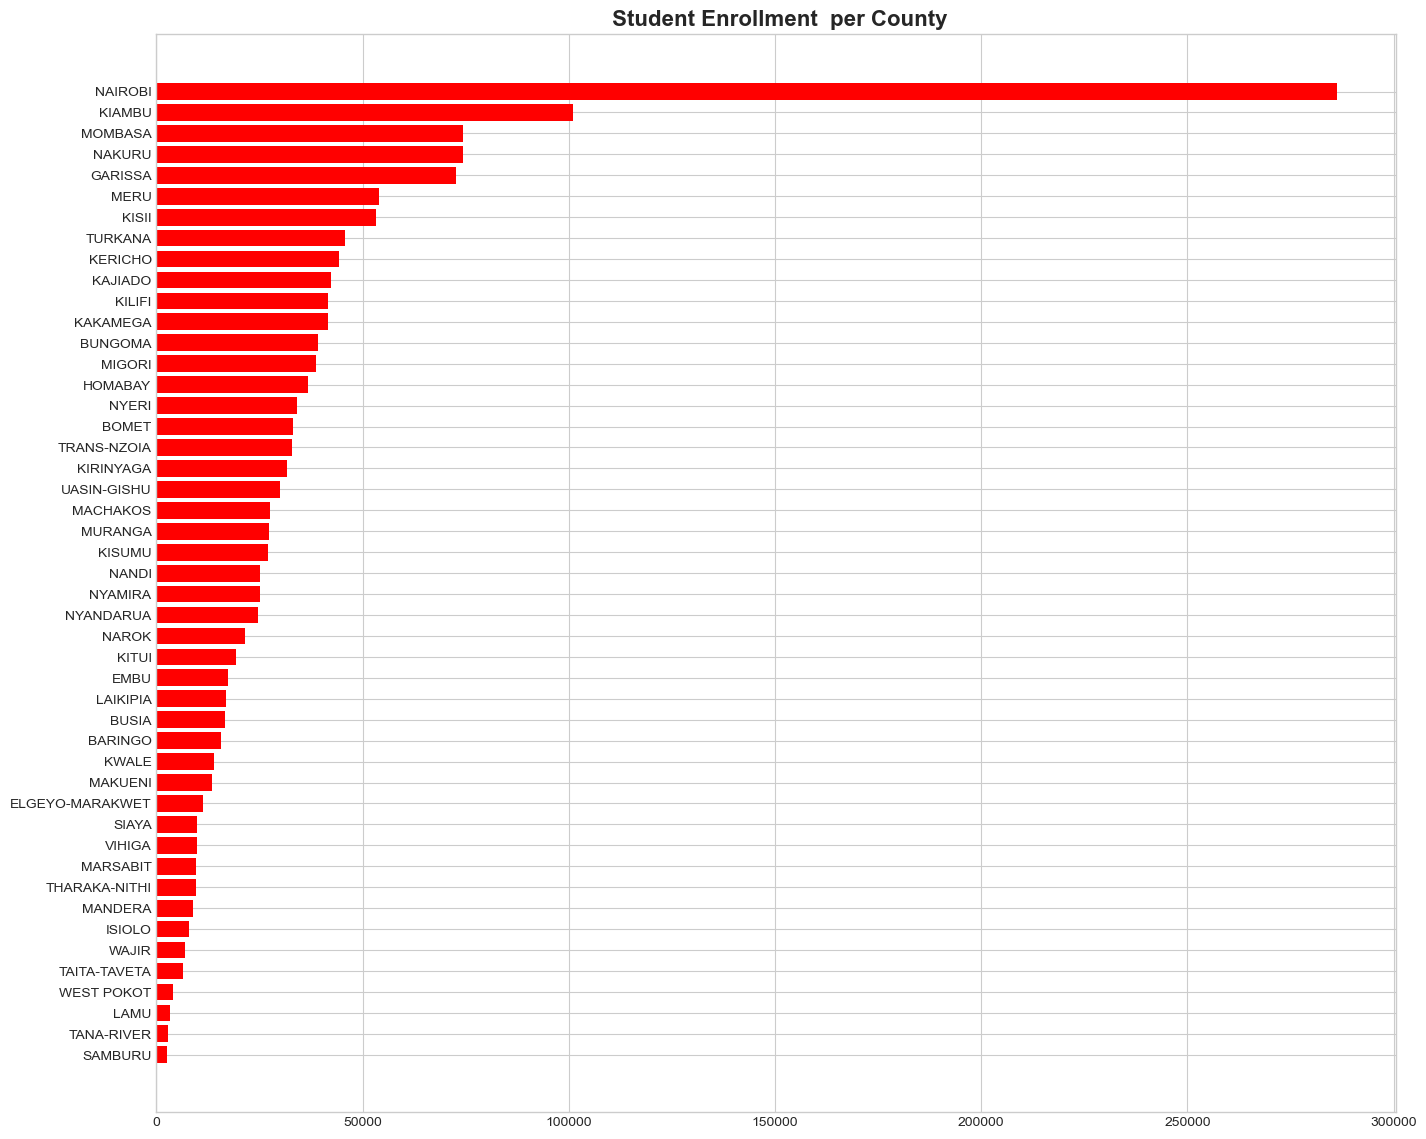

In [71]:
labels = df4.county
plt.figure(figsize = (16, 14))
plt.barh(df4.county, df4.Total, color = 'red')
#plt.legend(labels = df2.county, loc='upper left')
plt.title(' Student Enrollment  per County', weight='bold', fontsize = 16)
#plt.savefig('output/team_rep_per_country.png')
plt.show()

#### 6. What percentage of enrollment is from Nairobi?

In [39]:

Nairobi_enrollment = round(((df2[df2['county'] == 'NAIROBI']['Total'].values[0])/df2['Total'].sum())*100, 1)
Nairobi_enrollment

18.0

#### 7. Which county has the lowest Enrollment of students

In [40]:

least_enrollment = df2[df2['Total'] == df2['Total'].min()]['county'].values[0]
least_enrollment
value = df2['Total'].min()
print(f'County with the least Enrollment is: {least_enrollment}, with {value} number of students in 2024.')


County with the least Enrollment is: SAMBURU, with 2542 number of students in 2024.


#### 8. What is the mean enrollment of boys and girls in the Country


In [41]:
boys_mean = df2['Total_boys'].mean()
print(f'The mean Enrollment of boys is: {boys_mean:.0f}')

girls_mean = df2['Total_girls'].mean()
print(f'The mean Enrollment of girls is: {girls_mean:.0f}')

The mean Enrollment of boys is: 16595
The mean Enrollment of girls is: 17261


#### 9. What is the difference in mean enrollment between boys and girls

In [42]:
diff_mean = girls_mean-boys_mean
print(f'Girls had a higher enrollment with an average {diff_mean:.0f} students more.')

Girls had a higher enrollment with an average 666 students more.


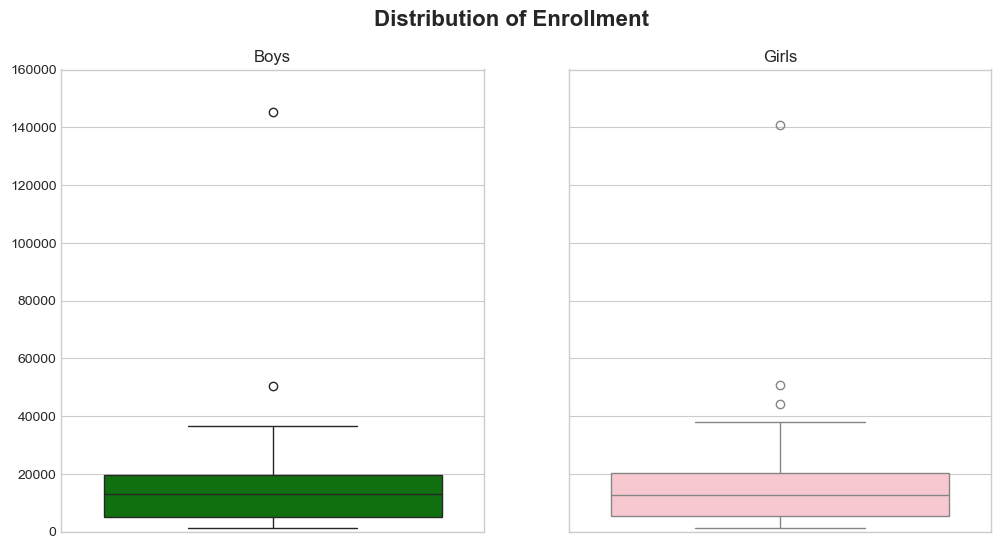

In [49]:
fig, (ax1, ax2)=plt.subplots(nrows = 1, ncols = 2, figsize=(12, 6), sharey = True)
sns.boxplot(df2, y = 'Total_boys', showfliers=True, color = 'green', ax = ax1)
sns.boxplot(df2, y = 'Total_girls', color='pink', showfliers=True, ax = ax2)
fig.suptitle('Distribution of Enrollment', weight = 'bold', fontsize = 16 )
ax1.set(title = 'Boys', ylabel = None, ylim=(0, 160000))
ax2.set(title='Girls')
plt.show()